In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
mcdon = get_pricing("MCD",
                   start_date = '2017-01-01',
                   end_date = '2017-02-01',
                   frequency = 'minute')

In [99]:
mcdon.head()

,open_price,high,low,close_price,volume,price
2017-01-03 14:31:00+00:00,121.86,121.86,121.57,121.63,123665.0,121.63
2017-01-03 14:32:00+00:00,121.73,121.92,121.41,121.45,13536.0,121.45
2017-01-03 14:33:00+00:00,121.45,121.79,121.45,121.52,17562.0,121.52
2017-01-03 14:34:00+00:00,121.45,121.80,121.44,121.75,12072.0,121.75
2017-01-03 14:35:00+00:00,121.74,122.00,121.66,121.99,8100.0,121.99


In [100]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


In [101]:
mcdon.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open_price,8188.0,121.416734,1.049238,118.230,NaN,NaN,NaN,123.23
high,8188.0,121.442347,1.048474,118.348,NaN,NaN,NaN,123.34
low,8188.0,121.390902,1.050827,118.180,NaN,NaN,NaN,123.14
close_price,8188.0,121.417112,1.049537,118.250,NaN,NaN,NaN,123.24
volume,8190.0,7214.384737,10302.560171,0.000,2776.500,4700.00,8045.00,399592.00
price,8190.0,121.417145,1.049525,118.250,120.745,121.52,122.31,123.24


In [102]:
mcdon = get_pricing("MCD",
                   start_date = '2005-01-01',
                   end_date = '2017-01-01',
                   frequency = 'daily')

In [103]:
mcdon.head()

,open_price,high,low,close_price,volume,price
2005-01-03 00:00:00+00:00,22.110,22.550,22.068,22.271,4324900.0,22.271
2005-01-04 00:00:00+00:00,22.208,22.606,22.208,22.424,5149200.0,22.424
2005-01-05 00:00:00+00:00,22.446,22.578,22.278,22.285,3840200.0,22.285
2005-01-06 00:00:00+00:00,22.278,22.537,22.250,22.467,3502500.0,22.467
2005-01-07 00:00:00+00:00,22.411,22.516,22.201,22.278,3458700.0,22.278


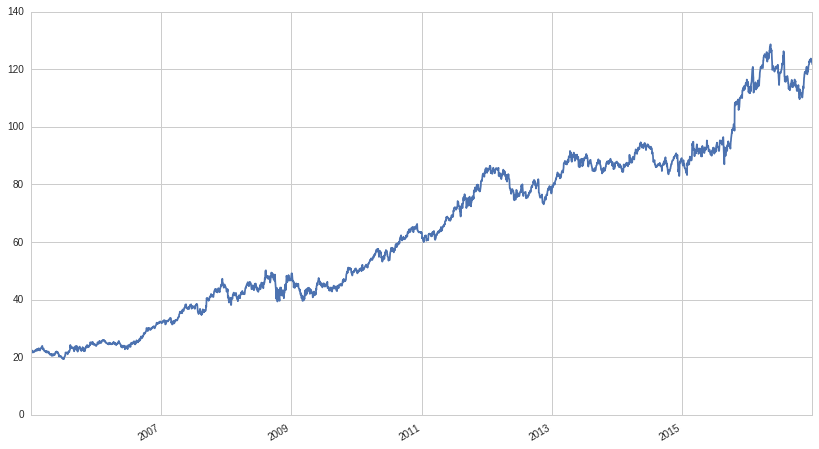

In [104]:
mcdon['close_price'].plot()

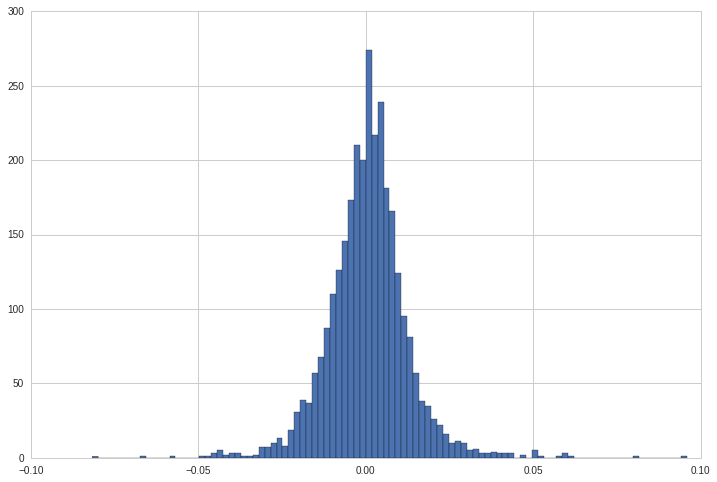

In [105]:
mcdon['close_price'].pct_change(1).hist(bins=100, figsize=(12,8))

In [106]:
mcdon_eq_info = symbols('MCD')

In [107]:
type(mcdon_eq_info)

<type 'zipline.assets._assets.Equity'>

In [108]:
mcdon_eq_info.to_dict()

{'asset_name': u'MCDONALDS CORP',
 'auto_close_date': Timestamp('2017-12-07 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-12-04 00:00:00+0000', tz='UTC'),
 'exchange': u'NYSE',
 'exchange_full': u'NEW YORK STOCK EXCHANGE',
 'first_traded': None,
 'sid': 4707,
 'start_date': Timestamp('2002-01-01 00:00:00+0000', tz='UTC'),
 'symbol': u'MCD'}

In [109]:
for key in mcdon_eq_info.to_dict():
    print (key)
    print(mcdon_eq_info.to_dict()[key])
    print('\n')
          

end_date
2017-12-04 00:00:00+00:00


exchange
NYSE


auto_close_date
2017-12-07 00:00:00+00:00


symbol
MCD


first_traded
None


asset_name
MCDONALDS CORP


exchange_full
NEW YORK STOCK EXCHANGE


sid
4707


start_date
2002-01-01 00:00:00+00:00




# Start from Pipeline
```
https://www.quantopian.com/tutorials/pipeline
```

## Many trading algorithms have the following structure:
```
1.For each asset in a known (large) set, compute N scalar values for the asset based on a trailing window of data.

2.Select a smaller tradeable set of assets based on the values computed in (1).

3.Calculate desired portfolio weights on the set of assets selected in (2).

4.Place orders to move the algorithm’s current portfolio allocations to the desired weights computed in (3).
```

## There are several technical challenges with doing this robustly. These include:
 ```
 1. efficiently querying large sets of assets
 2. performing computations on large sets of assets
 3. handling adjustments (splits and dividends)
 4. asset delistings
Pipeline exists to solve these challenges by providing a uniform API for expressing computations on a diverse collection of datasets.
```

In [110]:
from quantopian.pipeline import Pipeline

In [111]:
def make_pipeline():
    return Pipeline()

In [112]:
my_pipe = make_pipeline()

In [113]:
from quantopian.research import run_pipeline

In [114]:
result = run_pipeline(my_pipe, '2015-05-05', '2015-05-05')

In [115]:
result.head()

Empty DataFrame
Columns: []
Index: [(2015-05-05 00:00:00+00:00, Equity(2 [ARNC])), (2015-05-05 00:00:00+00:00, Equity(21 [AAME])), (2015-05-05 00:00:00+00:00, Equity(24 [AAPL])), (2015-05-05 00:00:00+00:00, Equity(25 [ARNC_PR])), (2015-05-05 00:00:00+00:00, Equity(31 [ABAX]))]

In [116]:
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import SimpleMovingAverage

In [117]:
mean_close_10 = SimpleMovingAverage(
                inputs=[USEquityPricing.close],
                window_length=10
)


In [118]:
def make_pipeline():
    mean_close_10 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=10
    )
    
    return Pipeline(
        columns={
            '10_day_mean_close' : mean_close_10
        }
    )

In [119]:
result = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
result.head()

10_day_mean_close
2015-05-05 00:00:00+00:00 Equity(2 [ARNC])                13.5595
                          Equity(21 [AAME])                3.9625
                          Equity(24 [AAPL])              129.0257
                          Equity(25 [ARNC_PR])            88.3625
                          Equity(31 [ABAX])               61.9209

In [120]:
def make_pipeline():
    mean_close_10 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=10
    )
    
    latest_close = USEquityPricing.close.latest
    
    return Pipeline(
        columns = {
            'mean_close_10' : mean_close_10,
            'latest_close_price' : latest_close 
        }
    )

In [121]:
result = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
result.head()

latest_close_price  \
2015-05-05 00:00:00+00:00 Equity(2 [ARNC])                  14.015   
                          Equity(21 [AAME])                    NaN   
                          Equity(24 [AAPL])                128.699   
                          Equity(25 [ARNC_PR])                 NaN   
                          Equity(31 [ABAX])                 55.030   

                                                mean_close_10  
2015-05-05 00:00:00+00:00 Equity(2 [ARNC])            13.5595  
                          Equity(21 [AAME])            3.9625  
                          Equity(24 [AAPL])          129.0257  
                          Equity(25 [ARNC_PR])        88.3625  
                          Equity(31 [ABAX])           61.9209

In [122]:
mean_close_10 = SimpleMovingAverage(
    inputs=[USEquityPricing.close],
    window_length=10
)

mean_close_30 = SimpleMovingAverage(
    inputs=[USEquityPricing.close],
    window_length=30
)

percent_diffenence = (mean_close_10 - mean_close_30) / mean_close_30

In [123]:
def make_pipeline():
    mean_close_10 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=10
    )

    mean_close_30 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=30
    )

    percent_diffenence = (mean_close_10 - mean_close_30) / mean_close_30
    
    return Pipeline(
        columns = {
            'percent_diffenence' : percent_diffenence
        }
    )

In [124]:
result = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
result.head()

# The following example produces a filter that returns True whenever the latest close price is above $20.
last_close_price = USEquityPricing.close.latest
close_price_filter = last_close_price > 20

# Filter

In [125]:
# this example produces a filter that returns True whenever the 10-day mean is below the 30-day mean.
mean_close_10 = SimpleMovingAverage(
    inputs=[USEquityPricing.close],
    window_length=10
)

mean_close_30 = SimpleMovingAverage(
    inputs=[USEquityPricing.close],
    window_length=30
)

mean_crossover_filter = mean_close_10 < mean_close_30

In [126]:
last_close_price = USEquityPricing.close.latest
top_close_price_filter = last_close_price.top(200)

In [127]:
from quantopian.pipeline.factors import AverageDollarVolume, SimpleMovingAverage

In [128]:
dollar_volume = AverageDollarVolume(window_length=30)

In [129]:
high_dollar_volume = (dollar_volume > 10000000)

In [132]:
def make_pipeline():
    mean_close_10 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=10
    )
    
    mean_close_30 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=30
    )
    
    percent_difference = (mean_close_10 - mean_close_30)/mean_close_30
    
    dollar_volume = AverageDollarVolume(window_length=30)
    high_dollar_volume = (dollar_volume > 10000000)
    
    return Pipeline(
        columns = {
            'percent_diffenence' : percent_diffenence,
            'high_dollar_volume' : high_dollar_volume
        },
    )
    

In [133]:
result = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
result.head()

high_dollar_volume  \
2015-05-05 00:00:00+00:00 Equity(2 [ARNC])                   True   
                          Equity(21 [AAME])                 False   
                          Equity(24 [AAPL])                  True   
                          Equity(25 [ARNC_PR])              False   
                          Equity(31 [ABAX])                 False   

                                                percent_diffenence  
2015-05-05 00:00:00+00:00 Equity(2 [ARNC])                0.017975  
                          Equity(21 [AAME])              -0.002325  
                          Equity(24 [AAPL])               0.016905  
                          Equity(25 [ARNC_PR])            0.021544  
                          Equity(31 [ABAX])              -0.019639

# Applying A Sceen

In [138]:
def make_pipeline():
    mean_close_10 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=10
    )
    
    mean_close_30 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=30
    )
    
    percent_difference = (mean_close_10 - mean_close_30)/mean_close_30
    
    dollar_volume = AverageDollarVolume(window_length=30)
    high_dollar_volume = (dollar_volume > 10000000)
    
    return Pipeline(
        columns = {
            'percent_diffenence' : percent_diffenence,
        },
        screen=high_dollar_volume
    )
    

In [139]:
result = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
print('Number of Securities that passed the filter: %d' % len(result))

Number of Securities that passed the filter: 2106


In [140]:
low_dollar_volume = ~high_dollar_volume

In [142]:
high_dollar_volume = dollar_volume.percentile_between(90,100)
latest_close = USEquityPricing.close.latest
above_20 = latest_close > 20

is_tradeable = latest_close & above_20

In [143]:
def make_pipeline():

    mean_close_10 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=10
    )
    mean_close_30 = SimpleMovingAverage(
        inputs=[USEquityPricing.close],
        window_length=30
    )

    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30

    dollar_volume = AverageDollarVolume(window_length=30)
    high_dollar_volume = dollar_volume.percentile_between(90, 100)

    latest_close = USEquityPricing.close.latest
    above_20 = latest_close > 20

    is_tradeable = high_dollar_volume & above_20

    return Pipeline(
        columns={
            'percent_difference': percent_difference
        },
        screen=is_tradeable
    )

In [145]:
result = run_pipeline(make_pipeline(), '2015-05-05', '2015-05-05')
print('Number of securities that passed the filter: %d' % len(result))

Number of securities that passed the filter: 742
